<a href="https://colab.research.google.com/github/andresit02/Examen-II-BIMESTRE/blob/main/ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from typing import Callable

def ODE_euler(
    *,
    a: float,
    b: float,
    f: Callable[[float, float], float],
    y_t0: float,
    N: int,
) -> tuple[list[float], list[float], float]:
    """Solves (numerically) an ODE of the form
        dy/dt = f(t, y)
            y(t_0) = y_t0, a <= t_0 <= b
    using the Euler method for the N+1 points in the time range [a, b].

    It generates N+1 mesh points with:
        t_i = a + i*h, h = (a - b) / N,
    where h is the step size.


    ## Parameters
    ``a``: initial time
    ``b``: final time
    ``f``: function of two variables ``t`` and ``y``
    ``y_t0``: initial condition
    ``N``: number of mesh points

    ## Return
    ``ys``: a list of the N+1 approximated values of y
    ``ts``: a list of the N+1 mesh points
    ``h``: the step size h

    """
    h = (b - a) / N
    t = a
    ts = [t]
    ys = [y_t0]

    for _ in range(N):
        y = ys[-1]
        y += h * f(t, y)
        ys.append(y)

        t += h
        ts.append(t)
    return ys, ts, h

In [7]:
# ####################################################################
from math import factorial

# Defino la ODE
def f(t: float, y: float) -> float:
    return -5 * y + 5 * t**2 + 2 * t

# Ubico los parámetros
a = 0.0
b = 1.0
y_t0 = 1/3
N = 10

# Resuelvo usando el metodo de euler
ys, ts, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Print the results
print("ys:", ys)
print("ts:", ts)
print("h:", h)

ys: [0.3333333333333333, 0.16666666666666666, 0.10833333333333334, 0.11416666666666667, 0.16208333333333336, 0.2410416666666667, 0.34552083333333333, 0.4727604166666667, 0.6213802083333333, 0.7906901041666666, 0.9803450520833332]
ts: [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999]
h: 0.1


****¿Cuál es el valor de h
 ?****

 - El valor de h es 0.1

****Sabiendo que la solución de la ODE es:****

****y(t)=t^2+1/3e^−5t****

****Grafique la solución real y la aproximación obtenida con el método de Euler.****

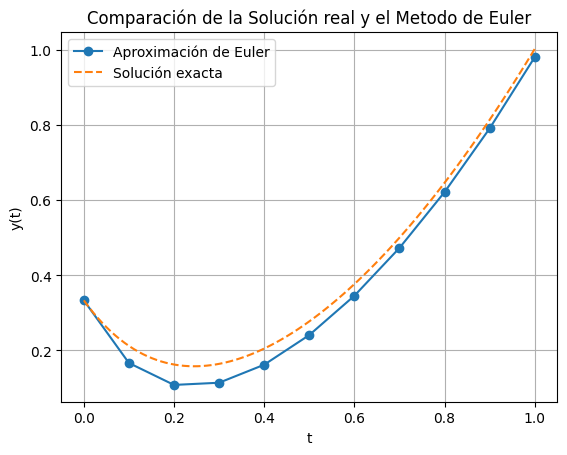

In [10]:
t_exact = np.linspace(a, b, 100)
y_exact = [exact_solution(t) for t in t_exact]

plt.plot(ts, ys, marker='o', linestyle='-', label='Aproximación de Euler')
plt.plot(t_exact, y_exact, linestyle='--', label='Solución exacta')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de la Solución real y el Metodo de Euler')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import math

def f(t: float, y: float) -> float:
    return (-5)*y + 5*(t**2) + 2*t

# Definición
a = 0
b = 1
y_t0 = 1/3
N = 5

y, t, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

y_exact = [(ti ** 2) + (1/3) * math.exp(-5 * ti) for ti in t]
error = [yi - y_exact_i for yi, y_exact_i in zip(y, y_exact)]

print("t:", t)
print("y:", y)

error_relativo = [abs(e / y_exact_i) for e, y_exact_i in zip(error, y_exact)]

print("Error relativo:", error_relativo)

# Cálculo del promedio del error relativo
promedio_error_relativo = sum(error_relativo) / len(error_relativo)
print("Promedio del error relativo: {:.4f}".format(promedio_error_relativo))

# Impresión del promedio del error relativo - notación científica
print("Promedio del error relativo (notación científica): {:.2e}".format(promedio_error_relativo))

t: [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
y: [0.3333333333333333, 0.0, 0.12000000000000002, 0.32000000000000006, 0.6000000000000001, 0.9600000000000002]
Error relativo: [0.0, 1.0, 0.4149530998670679, 0.1502823612710891, 0.07135867663330255, 0.04215131123268574]
Promedio del error relativo: 0.2798
Promedio del error relativo (notación científica): 2.80e-01


In [18]:
import math

# Definición
def f(t: float, y: float) -> float:
    return (-5) * y + 5 * (t ** 2) + 2 * t

# Parámetros
a = 0
b = 1
y_t0 = 1 / 3
N = 20

# Método de Euler
def ODE_euler(a, b, f, y_t0, N):
    h = (b - a) / N
    t_values = [a + i * h for i in range(N + 1)]
    y_values = [y_t0]
    y_current = y_t0

    for i in range(1, len(t_values)):
        y_next = y_current + h * f(t_values[i - 1], y_current)
        y_values.append(y_next)
        y_current = y_next

    return y_values, t_values, h

# Resolución mediante el método de Euler
y, t, h = ODE_euler(a=a, b=b, f=f, y_t0=y_t0, N=N)

# Solución exacta y cálculo del error
y_exact = [(ti ** 2) + (1 / 3) * math.exp(-5 * ti) for ti in t]
error = [yi - y_exact_i for yi, y_exact_i in zip(y, y_exact)]

print("\n=== Resultados del Método de Euler ===")
print("t:", [f"{ti:.4f}" for ti in t])
print("y:", [f"{yi:.4f}" for yi in y])

# Cálculo del error relativo
error_relativo = [abs(e / y_exact_i) for e, y_exact_i in zip(error, y_exact)]
print("\n=== Errores Relativos ===")
print([f"{er:.4f}" for er in error_relativo])

# Cálculo del promedio del error relativo
promedio_error_relativo = sum(error_relativo) / len(error_relativo)
print("\n=== Promedio del Error Relativo ===")
print(f"Promedio del error relativo: {promedio_error_relativo:.4f}")
print(f"Promedio del error relativo (notación científica): {promedio_error_relativo:.2e}")



=== Resultados del Método de Euler ===
t: ['0.0000', '0.0500', '0.1000', '0.1500', '0.2000', '0.2500', '0.3000', '0.3500', '0.4000', '0.4500', '0.5000', '0.5500', '0.6000', '0.6500', '0.7000', '0.7500', '0.8000', '0.8500', '0.9000', '0.9500', '1.0000']
y: ['0.3333', '0.2500', '0.1931', '0.1573', '0.1386', '0.1340', '0.1411', '0.1583', '0.1844', '0.2183', '0.2593', '0.3070', '0.3609', '0.4207', '0.4861', '0.5571', '0.6334', '0.7151', '0.8019', '0.8940', '0.9911']

=== Errores Relativos ===
['0.0000', '0.0462', '0.0898', '0.1257', '0.1475', '0.1521', '0.1416', '0.1225', '0.1011', '0.0814', '0.0650', '0.0519', '0.0417', '0.0339', '0.0279', '0.0232', '0.0196', '0.0167', '0.0145', '0.0126', '0.0111']

=== Promedio del Error Relativo ===
Promedio del error relativo: 0.0631
Promedio del error relativo (notación científica): 6.31e-02
